# 計算今彩539平均報酬率
 每注平均中獎金額
 報酬率 = (每注平均中獎金額 -每注下注金額) / 每注下注金額

STEP1 每注平均中獎金額= (得獎金額*組合數)/所有組合數

STEP2 報酬率 = (每注平均中獎金額 -每注下注金額) / 每注下注金額

In [1]:
from itertools import permutations
import math
math.factorial(5)

num_list34 = [i for i in range(1, 35)]
num_list5 = [i for i in range(1, 6)]
num_list39 = [i for i in range(1, 40)]
TOTLE=len(list(permutations(num_list39,5)))/math.factorial(5)

##頭獎組合數
permA = 1  
##2獎組合數
permB = (len(list(permutations(num_list5,4)))/ math.factorial(4))*len(list(permutations(num_list34,1)))
##3獎組合數
permC = (len(list(permutations(num_list5,3)))/ math.factorial(3))*(len(list(permutations(num_list34,2)))/math.factorial(2))
##4獎組合數
permD = (len(list(permutations(num_list5,2)))/ math.factorial(2))*(len(list(permutations(num_list34,3)))/math.factorial(3))

TOTLE_money = permA*8000000 + permB*20000 + permC*300 + permD*50

#每注平均中獎金額
pre_MONEY = TOTLE_money / TOTLE

#報酬率
ANSER = (pre_MONEY-50)/50
print('報酬率= ' + str (ANSER*100) + ' %' )



報酬率= -44.16047047625995 %


In [8]:
from itertools import combinations

TOTLE_NEW=len(list(combinations(num_list39,5)))

permAA = 1
permBB = len(list(combinations(num_list5,4)))*len(list(combinations(num_list34,1)))
permCC = len(list(combinations(num_list5,3)))*len(list(combinations(num_list34,2)))
permDD = len(list(combinations(num_list5,2)))*len(list(combinations(num_list34,3)))



TOTLE_money_NEW = permA*8000000 + permB*20000 + permC*300 + permD*50
pre_MONEY_NEW = TOTLE_money_NEW / TOTLE_NEW
ANSER_NEW = (pre_MONEY_NEW-50)/50
print('報酬率= ' + str (ANSER_NEW*100) + ' %' )



報酬率= -44.16047047625995 %


# 美國總統的身高近40年(10屆)是否有比較高?

## STEP1 帶入美國總統的身高近40年資料

In [7]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

with open('president_heights.csv') as f:
    myCsv = csv.reader(f)
    headers = next(myCsv)
    a=[int(row[2]) for row in myCsv]
    print(a)
    
    #print(a)
    a_old=np.array(a[:-10])
    a_new=np.array(a[-10:])
    print(a_new)
 #     print(a_old)
    
#nonMath = np.random.normal(66.0, 1.5, 100)
    
#nonMath   
        
       

[189, 170, 189, 163, 183, 171, 185, 168, 173, 183, 173, 173, 175, 178, 183, 193, 178, 173, 174, 183, 183, 168, 170, 178, 182, 180, 183, 178, 182, 188, 175, 179, 183, 193, 182, 183, 177, 185, 188, 188, 182, 185]
[183 193 182 183 177 185 188 188 182 185]


## STEP2 帶入公式  (two sample, 單尾 假設檢定)

non-math sample mean:178.21875
math sample mean:184.6
t-statistic:2.69562113651512
p-value:0.005113


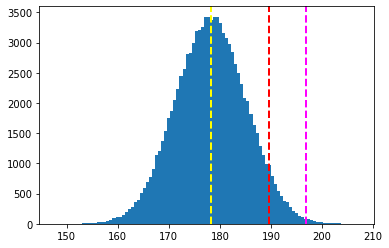

In [85]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

np.random.seed(123)
nonMath = a_old  #----------------------------------> 帶入資料
math = a_new     #----------------------------------> 帶入資料
print("non-math sample mean:" + str(nonMath.mean()))
print("math sample mean:" + str(math.mean()))

# Independent T-Test
t,p = stats.ttest_ind(math, nonMath)

# ttest_ind is 2-tailed, so half the resulting p-value to get a 1-tailed p-value


p1 = '%f' % (p/2)    #----------------------------------> 單尾  /2
print("t-statistic:" + str(t))
print("p-value:" + str(p1))

pop = np.random.normal(nonMath.mean(), nonMath.std(), 100000)
# calculate a 90% confidence interval. 10% of the probability is outside this, 5% in each tail
ci = stats.norm.interval(0.90, nonMath.mean(), nonMath.std())
plt.hist(pop, bins=100)
# show the hypothesized population mean
plt.axvline(pop.mean(), color='yellow', linestyle='dashed', linewidth=2)
# show the right-tail confidence interval threshold - 5% of propbability is under the curve to the right of this.
plt.axvline(ci[1], color='red', linestyle='dashed', linewidth=2)
# show the t-statistic - the p-value is the area under the curve to the right of this
plt.axvline(pop.mean() + t*pop.std(), color='magenta', linestyle='dashed', linewidth=2)
plt.show()

## 結論
### 從以上資料可以得到
non-math sample mean:178.21875

math sample mean:184.6

t-statistic:2.69562113651512

p-value:0.005113

### 從p-value<0.05  有顯著差異  (已把p值減半)

